In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
PATH_TO_DATA = './Data/2'


orders = pd.read_csv(f'{PATH_TO_DATA}/olist_orders_dataset.csv')
customers = pd.read_csv(f'{PATH_TO_DATA}/olist_customers_dataset.csv')
order_items = pd.read_csv(f'{PATH_TO_DATA}/olist_order_items_dataset.csv')
products = pd.read_csv(f'{PATH_TO_DATA}/olist_products_dataset.csv')
sellers = pd.read_csv(f'{PATH_TO_DATA}/olist_sellers_dataset.csv')
geolocation = pd.read_csv(f'{PATH_TO_DATA}/olist_geolocation_dataset.csv')
payments = pd.read_csv(f'{PATH_TO_DATA}/olist_order_payments_dataset.csv')
reviews = pd.read_csv(f'{PATH_TO_DATA}/olist_order_reviews_dataset.csv')
cat_name_trans = pd.read_csv(f'{PATH_TO_DATA}/product_category_name_translation.csv')

In [34]:
cat_name_trans

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [31]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,customer_city,customers_count
22,acucena,1
4113,xexeu,1
44,agua preta,1
43,agua nova,1
42,agua limpa,1
...,...,...
1143,curitiba,1521
558,brasilia,2131
453,belo horizonte,2773
3155,rio de janeiro,6882


Top city will be the metrics.

In [35]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Total orders are 99441.

In [123]:
order_count = orders.groupby(orders['order_status']).count()['order_id'].reset_index().rename({"order_id":"order_count"}, axis=1)
order_count["'%'order_count"] = (order_count['order_count'] / len(orders)) * 100
order_count

,order_status,order_count,'%'order_count
0,approved,2,0.002011
1,canceled,625,0.628513
2,created,5,0.005028
3,delivered,96478,97.020344
4,invoiced,314,0.315765
5,processing,301,0.302692
6,shipped,1107,1.113223
7,unavailable,609,0.612423


order completion rate: 97% orders are delivered. And cancel rate is also very minimum, less then 0.

In [14]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

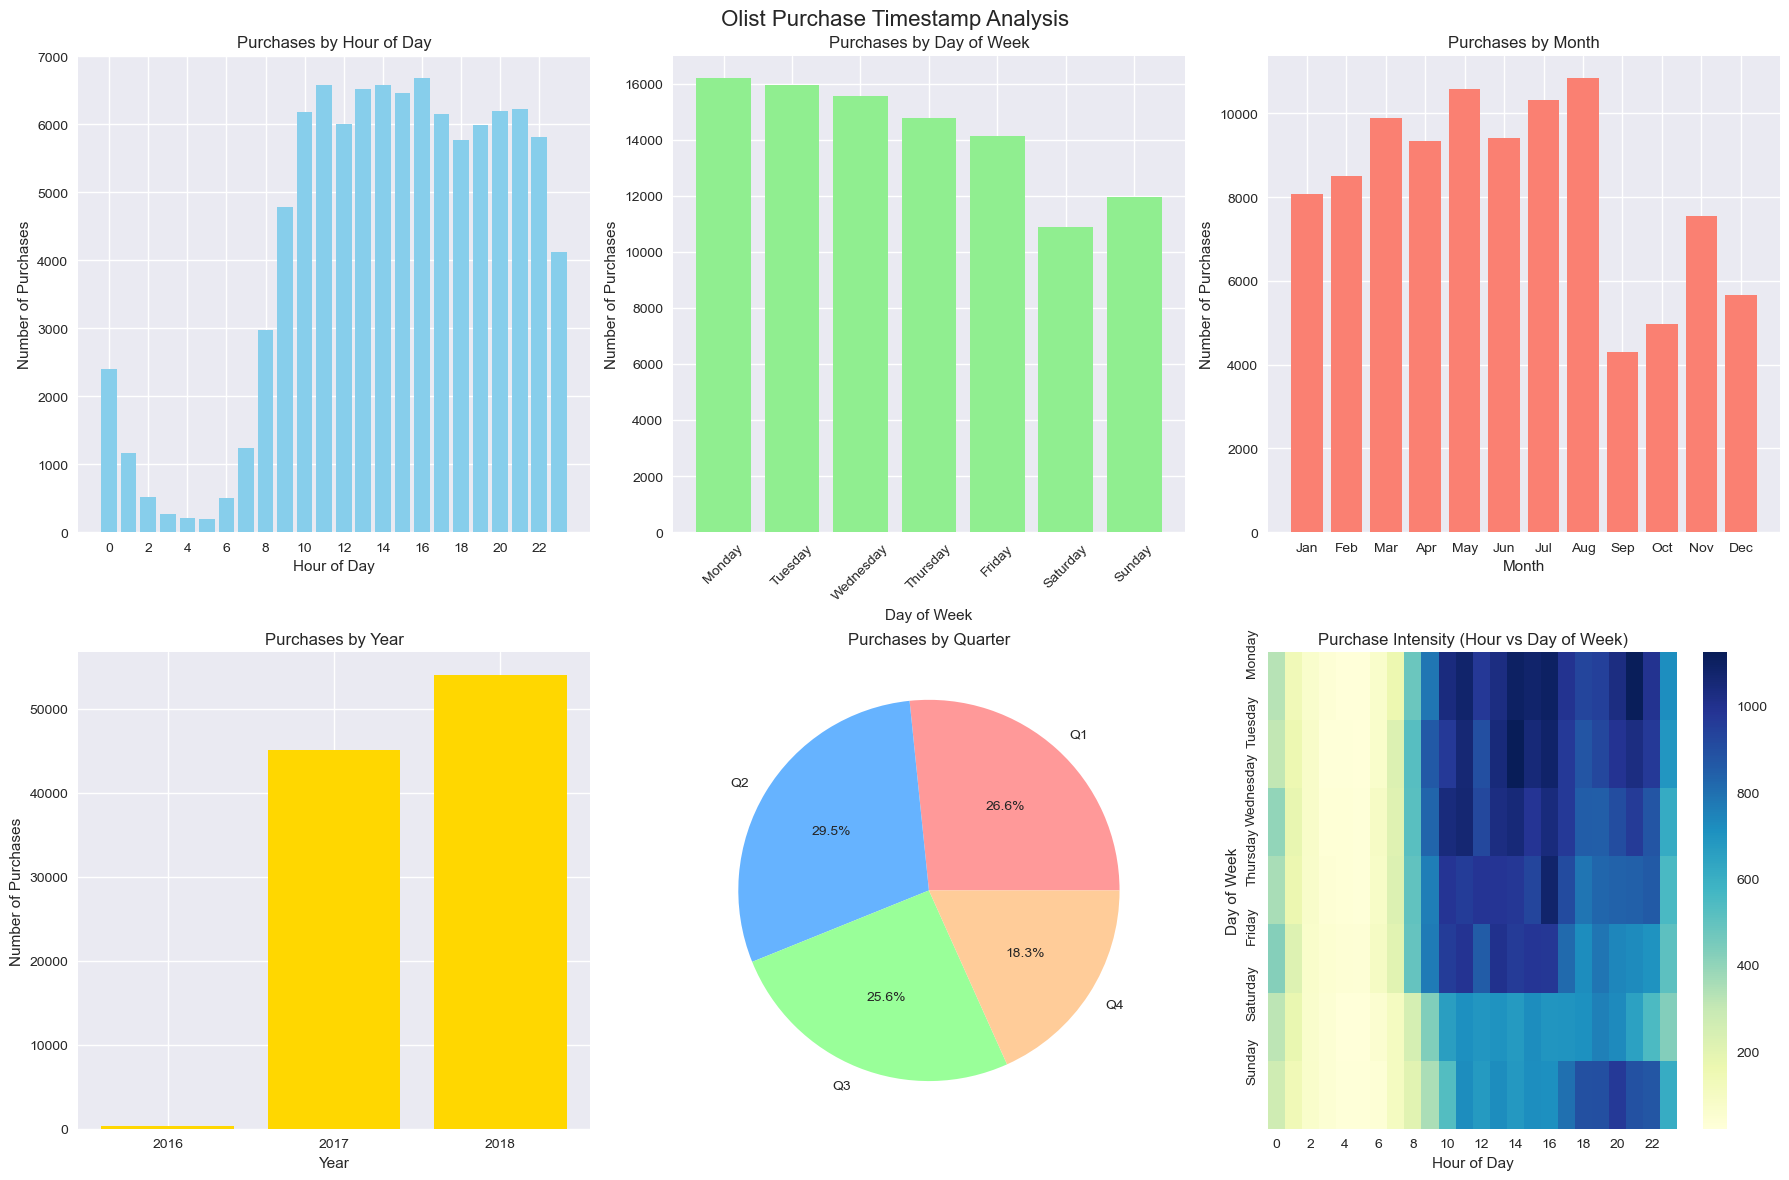

=== TIMESTAMP ANALYSIS SUMMARY ===
Data range: 2016-09-04 21:15:19 to 2018-10-17 17:30:18

Top 5 peak hours:
  16:00 - 6,675 purchases
  11:00 - 6,578 purchases
  14:00 - 6,569 purchases
  13:00 - 6,518 purchases
  15:00 - 6,454 purchases

5 least busy hours:
  5:00 - 188 purchases
  4:00 - 206 purchases
  3:00 - 272 purchases
  6:00 - 502 purchases
  2:00 - 510 purchases

Peak days of week:
  1. Monday - 16,196 purchases
  2. Tuesday - 15,963 purchases
  3. Wednesday - 15,552 purchases

Peak months:
  1. Aug - 10,843 purchases
  2. May - 10,573 purchases
  3. Jul - 10,318 purchases

=== SEASONAL ANALYSIS ===
Purchases by season:
  Summer: 30,573 purchases (30.7%)
  Spring: 29,809 purchases (30.0%)
  Winter: 22,251 purchases (22.4%)
  Fall: 16,808 purchases (16.9%)

Weekend purchases: 22,847 (23.0%)
Weekday purchases: 76,594 (77.0%)


In [ ]:
import seaborn as sns

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


# Extract date/time features
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
orders['day_name'] = orders['order_purchase_timestamp'].dt.day_name()
orders['week_of_year'] = orders['order_purchase_timestamp'].dt.isocalendar().week
orders['quarter'] = orders['order_purchase_timestamp'].dt.quarter

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Olist Purchase Timestamp Analysis', fontsize=16)

# 1. Hourly Purchase Distribution
hourly_purchases = orders['hour'].value_counts().sort_index()
axes[0, 0].bar(hourly_purchases.index, hourly_purchases.values, color='skyblue')
axes[0, 0].set_title('Purchases by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Daily Purchase Distribution
daily_purchases = orders['day_of_week'].value_counts().sort_index()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[0, 1].bar(range(7), daily_purchases.values, color='lightgreen')
axes[0, 1].set_title('Purchases by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_labels, rotation=45)

# 3. Monthly Purchase Distribution
monthly_purchases = orders['month'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 2].bar(monthly_purchases.index, monthly_purchases.values, color='salmon')
axes[0, 2].set_title('Purchases by Month')
axes[0, 2].set_xlabel('Month')
axes[0, 2].set_ylabel('Number of Purchases')
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].set_xticklabels(month_labels)

# 4. Yearly Purchase Distribution
yearly_purchases = orders['year'].value_counts().sort_index()
axes[1, 0].bar(yearly_purchases.index.astype(str), yearly_purchases.values, color='gold')
axes[1, 0].set_title('Purchases by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Purchases')

# 5. Quarterly Purchase Distribution
quarterly_purchases = orders['quarter'].value_counts().sort_index()
axes[1, 1].pie(quarterly_purchases.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[1, 1].set_title('Purchases by Quarter')

# 6. Heatmap of Hour vs Day of Week
pivot_table = orders.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(pivot_table, ax=axes[1, 2], cmap="YlGnBu")
axes[1, 2].set_title('Purchase Intensity (Hour vs Day of Week)')
axes[1, 2].set_xlabel('Hour of Day')
axes[1, 2].set_ylabel('Day of Week')
axes[1, 2].set_yticks(range(7))
axes[1, 2].set_yticklabels(day_labels)

plt.tight_layout()
plt.show()

# Additional analysis: Peak and non-peak periods
print("=== TIMESTAMP ANALYSIS SUMMARY ===")
print(f"Data range: {orders['order_purchase_timestamp'].min()} to {orders['order_purchase_timestamp'].max()}")

# Peak hours (top 5)
print("\nTop 5 peak hours:")
peak_hours = hourly_purchases.nlargest(5)
for hour, count in peak_hours.items():
    print(f"  {hour}:00 - {count:,} purchases")

# Least busy hours (bottom 5)
print("\n5 least busy hours:")
quiet_hours = hourly_purchases.nsmallest(5)
for hour, count in quiet_hours.items():
    print(f"  {hour}:00 - {count:,} purchases")

# Peak days
print("\nPeak days of week:")
peak_days = daily_purchases.nlargest(3)
for i, (day_idx, count) in enumerate(peak_days.items()):
    print(f"  {i+1}. {day_labels[day_idx]} - {count:,} purchases")

# Peak months
print("\nPeak months:")
peak_months = monthly_purchases.nlargest(3)
for i, (month, count) in enumerate(peak_months.items()):
    print(f"  {i+1}. {month_labels[month-1]} - {count:,} purchases")

# Seasonal analysis
print("\n=== SEASONAL ANALYSIS ===")
# Group by season (Northern Hemisphere seasons)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

orders['season'] = orders['month'].apply(get_season)
seasonal_purchases = orders['season'].value_counts()
print("Purchases by season:")
for season, count in seasonal_purchases.items():
    print(f"  {season}: {count:,} purchases ({count/len(orders)*100:.1f}%)")

# Weekend vs Weekday analysis
orders['is_weekend'] = orders['day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6
weekend_purchases = orders[orders['is_weekend']]['order_id'].count()
weekday_purchases = orders[~orders['is_weekend']]['order_id'].count()

print(f"\nWeekend purchases: {weekend_purchases:,} ({weekend_purchases/len(orders)*100:.1f}%)")
print(f"Weekday purchases: {weekday_purchases:,} ({weekday_purchases/len(orders)*100:.1f}%)")

C:\Users\ahmad\AppData\Local\Temp\ipykernel_16772\3215975014.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = orders.set_index('order_purchase_timestamp').resample('M').size()


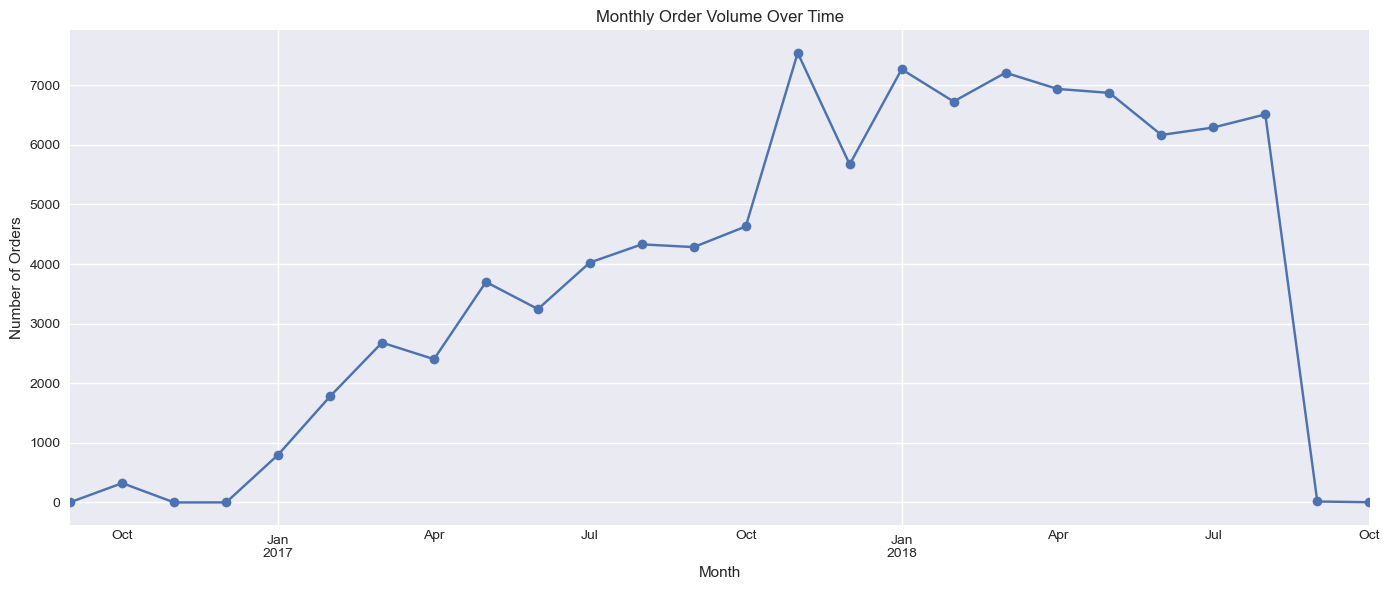

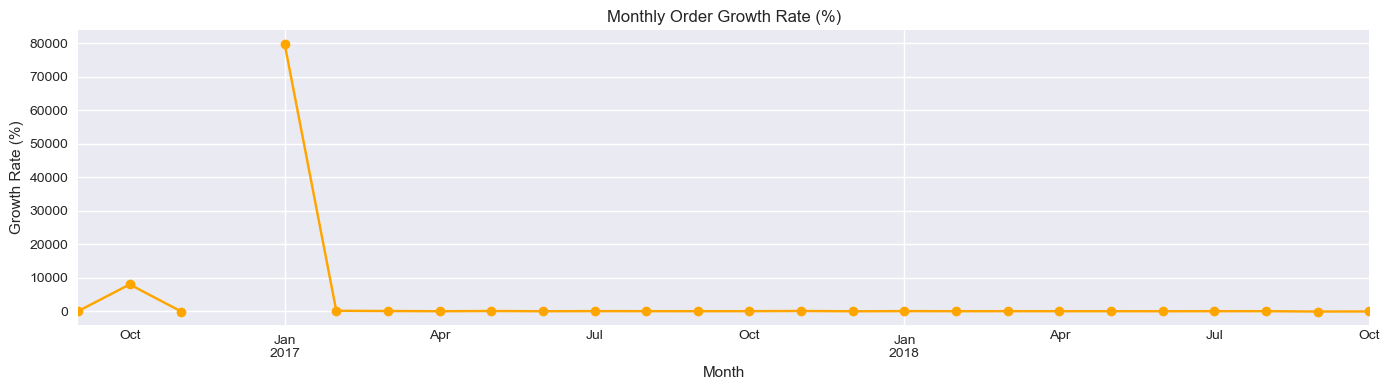

=== Time Series Growth Trend Summary ===
First month: 2016-09, Orders: 4
Last month: 2018-10, Orders: 4
Average monthly growth rate: inf%


In [114]:
# Aggregate orders by month to analyze growth trends
monthly_orders = orders.set_index('order_purchase_timestamp').resample('M').size()

# Plot the monthly order volume to visualize growth trends
plt.figure(figsize=(14, 6))
monthly_orders.plot(marker='o')
plt.title('Monthly Order Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display the monthly growth rate
monthly_growth = monthly_orders.pct_change().fillna(0) * 100
plt.figure(figsize=(14, 4))
monthly_growth.plot(marker='o', color='orange')
plt.title('Monthly Order Growth Rate (%)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print("=== Time Series Growth Trend Summary ===")
print(f"First month: {monthly_orders.index.min().strftime('%Y-%m')}, Orders: {monthly_orders.iloc[0]}")
print(f"Last month: {monthly_orders.index.max().strftime('%Y-%m')}, Orders: {monthly_orders.iloc[-1]}")
print(f"Average monthly growth rate: {monthly_growth.mean():.2f}%")

In [95]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day,hour,day_of_week,day_name,week_of_year,quarter,season,is_weekend
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,2,10,0,Monday,40,4,Fall,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,24,20,1,Tuesday,30,3,Summer,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,8,8,2,Wednesday,32,3,Summer,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,18,19,5,Saturday,46,4,Fall,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,13,21,1,Tuesday,7,1,Winter,False


In [115]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
orders['delivery_time'].sort_values(ascending=False).head(20)

19590   209 days 15:05:12
55619   208 days 08:26:32
61610   195 days 15:12:59
70307   194 days 20:24:15
89130   194 days 15:12:24
38509   194 days 01:11:24
11399   191 days 11:07:30
81401   189 days 20:42:57
54480   188 days 03:13:51
68769   187 days 17:51:08
62286   187 days 04:52:58
31228   186 days 05:40:57
74117   182 days 15:47:43
66407   181 days 01:27:09
40847   175 days 05:22:18
64489   174 days 01:09:14
86520   173 days 03:12:04
74759   172 days 03:20:55
37973   168 days 04:21:57
29519   168 days 01:59:14
Name: delivery_time, dtype: timedelta64[ns]

In [113]:
orders['delivery_time'].sort_values(ascending=True)

31522   0 days 12:48:07
41803   0 days 18:45:10
38792   0 days 20:31:39
97428   0 days 20:43:20
69580   0 days 21:22:41
              ...      
99283               NaT
99313               NaT
99347               NaT
99348               NaT
99415               NaT
Name: delivery_time, Length: 99441, dtype: timedelta64[ns]

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [96]:
order_items['price'].sum() / len(order_items)

np.float64(120.65373901464716)

Average order value is 120.

In [16]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

0 out of 112650 order_items are null.  It has numeric columns thats why we need to study if there are outliars there.

In [19]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Mean price is 120 but highest is 6735 this may be the outliar. Also how a product price may 0.85?

In [20]:
order_items[order_items['price']==6735]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [8]:
order_items[order_items['price']>=6000]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21


In [21]:
products[products['product_id']=='489ae2aa008f021502940f251d4cce7f']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0


<Axes: >

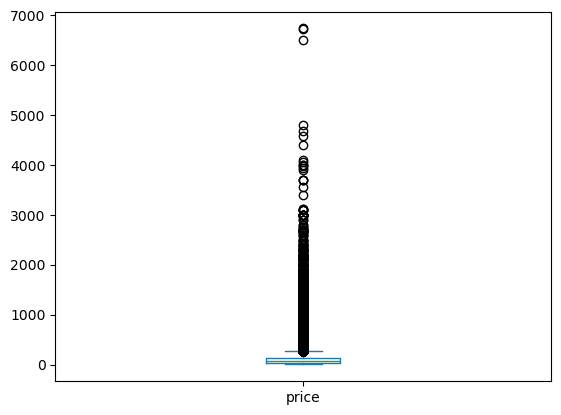

In [30]:
order_items[["price"]].plot(kind = 'box')

In [22]:
order_items["price"].sort_values(ascending=False).head(10)

3556      6735.00
112233    6729.00
107841    6499.00
74336     4799.00
11249     4690.00
62086     4590.00
29193     4399.87
45843     4099.99
78310     4059.00
59137     3999.90
Name: price, dtype: float64

Seems like there are theree outliar items there.

In [70]:
order_items["price"].sort_values(ascending=True).head()

27652    0.85
48625    0.85
87081    0.85
57302    1.20
57305    1.20
Name: price, dtype: float64

In [73]:
# Ensure both product_id columns are strings
products["product_id"] = products["product_id"].astype(str)
order_items["product_id"] = order_items["product_id"].astype(str)

# Now join
result = products.join(order_items.set_index("product_id")[["price", "freight_value"]], on="product_id", how="left")

In [74]:
result[result["price"]<2]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,freight_value
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,1.20,7.89


We have three products named "construcao_ferramentas_construcao" with price 0.85 and freight value 18 and 22. These things seems to be outliar, but if we see their freight value is slightly higher which indicates it not outliar. Because sometimes price is lower and freight value is higher to attract customers.

In [23]:
order_items["freight_value"].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

<Axes: >

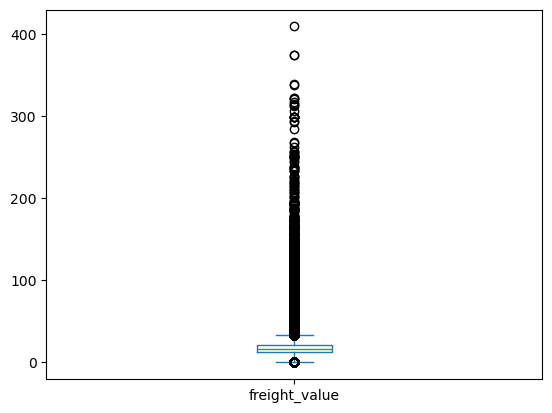

In [54]:
order_items["freight_value"].plot(kind = 'box')

In [53]:
order_items["freight_value"].sort_values(ascending=False).head()

73486    409.68
28044    375.28
3303     375.28
69797    339.59
16731    338.30
Name: freight_value, dtype: float64

In [56]:
order_items["freight_value"].min()

0.0

In [69]:
order_items["freight_value"].sort_values(ascending=True).head(400)

72420     0.00
95950     0.00
28395     0.00
103499    0.00
91884     0.00
          ... 
52747     0.03
52749     0.03
41983     0.03
46888     0.03
49174     0.03
Name: freight_value, Length: 400, dtype: float64

0 Frieight value is understandable, only one is 409, maybe a case where delivery is in the remote area etc.

In [25]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<Axes: >

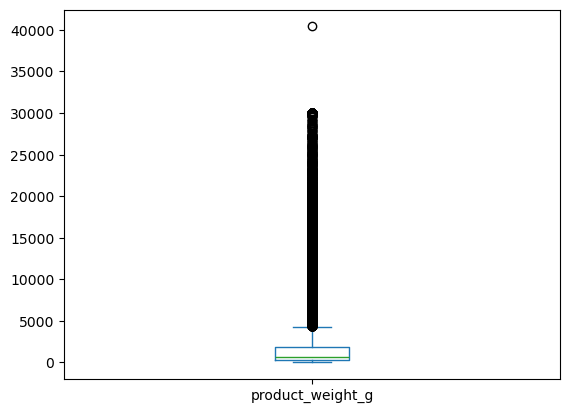

In [31]:
products["product_weight_g"].plot(kind="box")

In [18]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [62]:
category_dict = dict(zip(cat_name_trans['product_category_name'],
                          cat_name_trans['product_category_name_english']))

# Replace the Portuguese category names with English ones
products['product_category_name_english'] = products['product_category_name'].map(category_dict)
# For categories without translation, keep the original name
products['product_category_name_english'] = products['product_category_name_english'].fillna(products['product_category_name'])

In [63]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [71]:
products_count = products.groupby(products['product_category_name_english']).count()['product_id'].reset_index()
products_count.sort_values('product_id')

,product_category_name_english,product_id
11,cds_dvds_musicals,1
63,security_and_services,2
59,pc_gamer,3
29,fashion_childrens_clothes,5
46,home_comfort_2,5
...,...,...
49,housewares,2335
43,health_beauty,2444
39,furniture_decor,2657
67,sports_leisure,2867


In [98]:
# Merge products with order_items on 'product_id'
prod_order_items = pd.merge(products, order_items, on='product_id', how='inner')

# Merge the result with orders on 'order_id'
prod_order_items_orders = pd.merge(prod_order_items, orders, on='order_id', how='inner')

# Group by product and get top selling products by count
top_selling = (
    prod_order_items_orders.groupby(['product_id', 'product_category_name_english'])
    .size()
    .reset_index(name='sales_count')
    .sort_values('sales_count', ascending=False)
)

top_selling.sort_values('sales_count')

,product_id,product_category_name_english,sales_count
32284,ffa4ff381e25872b5bf85353ff7ab0c9,sports_leisure,1
37,004ffcbfa5aac82212a95bc972ea8a85,furniture_bedroom,1
39,005c6b24cc96dca3e2c01e824401030e,fashion_male_clothing,1
40,0060b415594c5e1200324ef1a18493c4,sports_leisure,1
42,006508eabcc19ae52ed87323124ad0e9,construction_tools_safety,1
...,...,...,...
6950,368c6c730842d78016ad823897a372db,garden_tools,388
7231,389d119b48cf3043d311335e499d9c6b,garden_tools,392
8456,422879e10f46682990de24d770e7f83d,garden_tools,484
19394,99a4788cb24856965c36a24e339b6058,bed_bath_table,488


I am not sure which table this or previous is sales for each catetgory.

In [26]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [131]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [28]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [122]:
payment_type = payments.groupby(payments['payment_type']).count()['order_id'].reset_index().rename({"order_id":"Order_count"}, axis=1)
payment_type["'%' Order_count"] = (payment_type["Order_count"] / len(payments)) * 100
payment_type

,payment_type,Order_count,'%' Order_count
0,boleto,19784,19.043952
1,credit_card,76795,73.922376
2,debit_card,1529,1.471806
3,not_defined,3,0.002888
4,voucher,5775,5.558978


In [31]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

No review score is null thats good, we can use this to understand the users.

In [32]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Good so far we only have minor issues not big, now we will deep dive towards insights.

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
customer_order_counts = orders.groupby('customer_id').size()
repeat_rate = (customer_order_counts > 1).mean() * 100
print(f"Repeat purchase rate: {repeat_rate:.2f}%")

Repeat purchase rate: 0.00%


In [19]:
( orders.groupby('order_status').count()['order_id'] / 99441 ) * 100

order_status
approved        0.002011
canceled        0.628513
created         0.005028
delivered      97.020344
invoiced        0.315765
processing      0.302692
shipped         1.113223
unavailable     0.612423
Name: order_id, dtype: float64

In [129]:
# Merge order_items with sellers to get seller info for each order
order_items_sellers = pd.merge(order_items, sellers, on='seller_id', how='left')

# Aggregate sales metrics per seller
seller_performance = (
    order_items_sellers.groupby(['seller_id', 'seller_city', 'seller_state'])
    .agg(
        total_sales=('price', 'sum'),
        total_orders=('order_id', 'nunique'),
        avg_order_value=('price', 'mean'),
        total_items_sold=('order_item_id', 'count'),
        avg_freight_value=('freight_value', 'mean')
    )
    .reset_index()
)

# Identify top-performing sellers by total sales
top_sellers = seller_performance.sort_values('total_sales', ascending=False).head(20)

# Analyze characteristics of top sellers
top_seller_cities = top_sellers['seller_city'].value_counts()
top_seller_states = top_sellers['seller_state'].value_counts()
top_seller_avg_order_value = top_sellers['avg_order_value'].mean()
top_seller_avg_freight = top_sellers['avg_freight_value'].mean()

print("Top-performing sellers' cities:\n", top_seller_cities)
print("\nTop-performing sellers' states:\n", top_seller_states)
print(f"\nAverage order value among top sellers: {top_seller_avg_order_value:.2f}")
print(f"Average freight value among top sellers: {top_seller_avg_freight:.2f}")

# Show the top sellers' performance table
top_sellers

Top-performing sellers' cities:
 seller_city
sao paulo                4
guariba                  1
lauro de freitas         1
sumare                   1
ibitinga                 1
itaquaquecetuba          1
barueri                  1
piracicaba               1
rio de janeiro           1
petropolis               1
ribeirao preto           1
santa barbara d´oeste    1
sao jose do rio preto    1
santo andre              1
ilicinea                 1
campo limpo paulista     1
teresopolis              1
Name: count, dtype: int64

Top-performing sellers' states:
 seller_state
SP    15
RJ     3
BA     1
MG     1
Name: count, dtype: int64

Average order value among top sellers: 199.31
Average freight value among top sellers: 21.94


,seller_id,seller_city,seller_state,total_sales,total_orders,avg_order_value,total_items_sold,avg_freight_value
857,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63,1132,198.505735,1156,17.446427
1013,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05,358,543.356220,410,31.903976
881,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,200472.92,1806,100.892260,1987,17.648234
3024,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03,585,331.129744,586,17.137713
1535,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,187923.89,982,137.774113,1364,37.839113
1560,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,176431.87,336,518.917265,340,18.594647
2643,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,160236.57,1314,103.311779,1551,16.090103
1505,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,141745.53,1160,121.046567,1171,17.850427
192,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,138968.55,915,97.316912,1428,23.733992
1824,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,135171.70,1287,90.174583,1499,16.965297


In [124]:
# Identify underserved regions with high potential

# Step 1: Find top cities by customer count
top_cities = customers_city.sort_values('customers_count', ascending=False).head(20)

# Step 2: Aggregate seller count by city
seller_city_counts = sellers.groupby('seller_city').size().reset_index(name='seller_count')

# Step 3: Merge top cities with seller counts
city_seller_coverage = pd.merge(top_cities, seller_city_counts, left_on='customer_city', right_on='seller_city', how='left').fillna(0)
city_seller_coverage['seller_count'] = city_seller_coverage['seller_count'].astype(int)

# Step 4: Calculate customer-to-seller ratio
city_seller_coverage['customers_per_seller'] = city_seller_coverage['customers_count'] / city_seller_coverage['seller_count'].replace(0, 1)

# Step 5: Identify cities with high customer count but low seller count (underserved)
underserved = city_seller_coverage.sort_values(['customers_per_seller', 'customers_count'], ascending=[False, False])

# Show top underserved regions
underserved[['customer_city', 'customers_count', 'seller_count', 'customers_per_seller']].head(10)

,customer_city,customers_count,seller_count,customers_per_seller
7,salvador,1245,7,177.857143
18,recife,613,5,122.600000
10,niteroi,849,8,106.125000
16,fortaleza,654,7,93.428571
3,brasilia,2131,28,76.107143
1,rio de janeiro,6882,96,71.687500
6,porto alegre,1379,28,49.250000
13,santos,713,16,44.562500
2,belo horizonte,2773,68,40.779412
15,sao jose dos campos,691,18,38.388889


In [125]:
# Calculate market penetration by state and city

# 1. Number of unique customers per state and city
customers_by_state = customers.groupby('customer_state')['customer_id'].nunique().reset_index(name='unique_customers')
customers_by_city = customers.groupby(['customer_state', 'customer_city'])['customer_id'].nunique().reset_index(name='unique_customers')

# 2. Number of unique orders per state and city
orders_with_customer = pd.merge(orders, customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')
orders_by_state = orders_with_customer.groupby('customer_state')['order_id'].nunique().reset_index(name='unique_orders')
orders_by_city = orders_with_customer.groupby(['customer_state', 'customer_city'])['order_id'].nunique().reset_index(name='unique_orders')

# 3. Market penetration: orders per customer (can be interpreted as penetration ratio)
state_penetration = pd.merge(customers_by_state, orders_by_state, on='customer_state')
state_penetration['orders_per_customer'] = state_penetration['unique_orders'] / state_penetration['unique_customers']

city_penetration = pd.merge(customers_by_city, orders_by_city, on=['customer_state', 'customer_city'])
city_penetration['orders_per_customer'] = city_penetration['unique_orders'] / city_penetration['unique_customers']

# Show top 10 states and cities by market penetration
print("Top 10 states by market penetration (orders per customer):")
print(state_penetration.sort_values('orders_per_customer', ascending=False).head(10))

print("\nTop 10 cities by market penetration (orders per customer):")
print(city_penetration.sort_values('orders_per_customer', ascending=False).head(10))

Top 10 states by market penetration (orders per customer):
  customer_state  unique_customers  unique_orders  orders_per_customer
0             AC                81             81                  1.0
1             AL               413            413                  1.0
2             AM               148            148                  1.0
3             AP                68             68                  1.0
4             BA              3380           3380                  1.0
5             CE              1336           1336                  1.0
6             DF              2140           2140                  1.0
7             ES              2033           2033                  1.0
8             GO              2020           2020                  1.0
9             MA               747            747                  1.0

Top 10 cities by market penetration (orders per customer):
     customer_state    customer_city  unique_customers  unique_orders  \
4309             TO        

Customer Lifetime Value (CLV) by Cohort Month:
   cohort_month         CLV
0       2016-09   66.840000
1       2016-10  152.801420
2       2016-12   10.900000
3       2017-01  150.391087
4       2017-02  138.934281
5       2017-03  139.576547
6       2017-04  149.720146
7       2017-05  136.775984
8       2017-06  133.447951
9       2017-07  123.703795
10      2017-08  132.526363
11      2017-09  145.718014
12      2017-10  143.428942
13      2017-11  133.917202
14      2017-12  131.132411
15      2018-01  130.696156
16      2018-02  125.472460
17      2018-03  136.349111
18      2018-04  143.629882
19      2018-05  144.990205
20      2018-06  140.282846
21      2018-07  142.324733
22      2018-08  131.247901
23      2018-09    9.062500
24      2018-10    0.000000


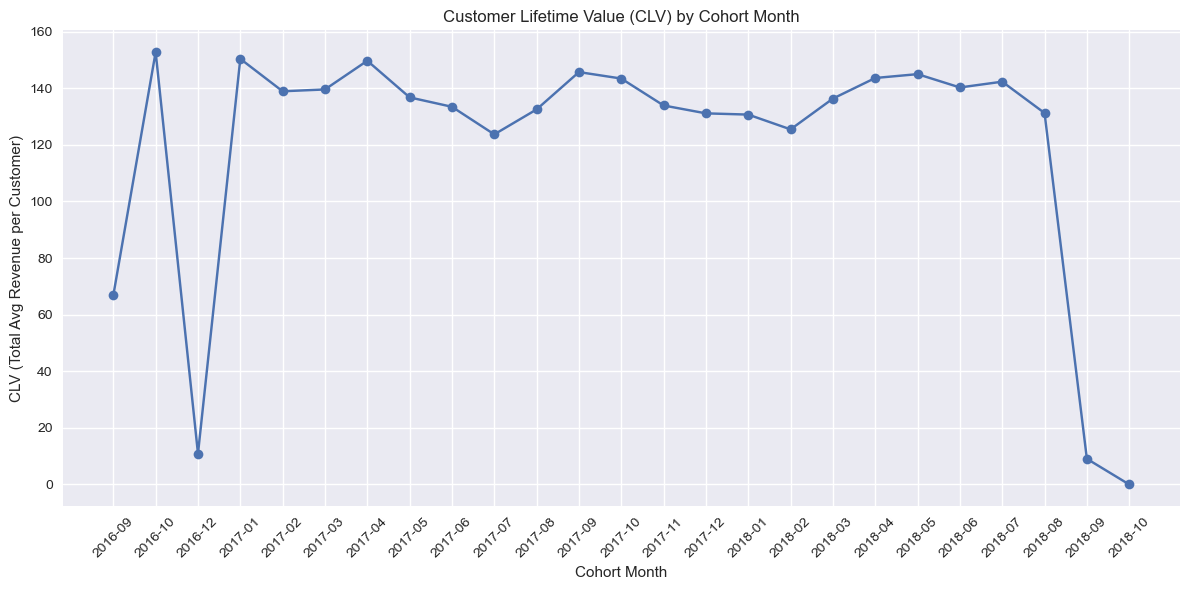

In [126]:
# Calculate Customer Lifetime Value (CLV) using cohort analysis

# 1. Assign cohort group based on each customer's first purchase month
orders_with_customer['cohort_month'] = orders_with_customer.groupby('customer_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_with_customer['order_month'] = orders_with_customer['order_purchase_timestamp'].dt.to_period('M')

# 2. Calculate the number of months since the first purchase (cohort index)
orders_with_customer['cohort_index'] = (
    (orders_with_customer['order_month'].dt.year - orders_with_customer['cohort_month'].dt.year) * 12 +
    (orders_with_customer['order_month'].dt.month - orders_with_customer['cohort_month'].dt.month) + 1
)

# 3. Calculate monthly revenue per customer
# Merge order_items to get price per order
order_items_per_order = order_items.groupby('order_id')['price'].sum().reset_index()
orders_clv = pd.merge(orders_with_customer, order_items_per_order, on='order_id', how='left')

# 4. Aggregate revenue by cohort and cohort index
cohort_data = (
    orders_clv.groupby(['cohort_month', 'cohort_index'])
    .agg({'customer_id': 'nunique', 'price': 'sum'})
    .rename(columns={'customer_id': 'n_customers', 'price': 'total_revenue'})
    .reset_index()
)

# 5. Calculate average revenue per customer for each cohort period
cohort_data['avg_revenue_per_customer'] = cohort_data['total_revenue'] / cohort_data['n_customers']

# 6. Calculate CLV as the sum of average revenue per customer across cohort periods
clv_by_cohort = cohort_data.groupby('cohort_month')['avg_revenue_per_customer'].sum().reset_index()
clv_by_cohort.columns = ['cohort_month', 'CLV']

print("Customer Lifetime Value (CLV) by Cohort Month:")
print(clv_by_cohort)

# Optional: Plot CLV by cohort
plt.figure(figsize=(12,6))
plt.plot(clv_by_cohort['cohort_month'].astype(str), clv_by_cohort['CLV'], marker='o')
plt.title('Customer Lifetime Value (CLV) by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('CLV (Total Avg Revenue per Customer)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

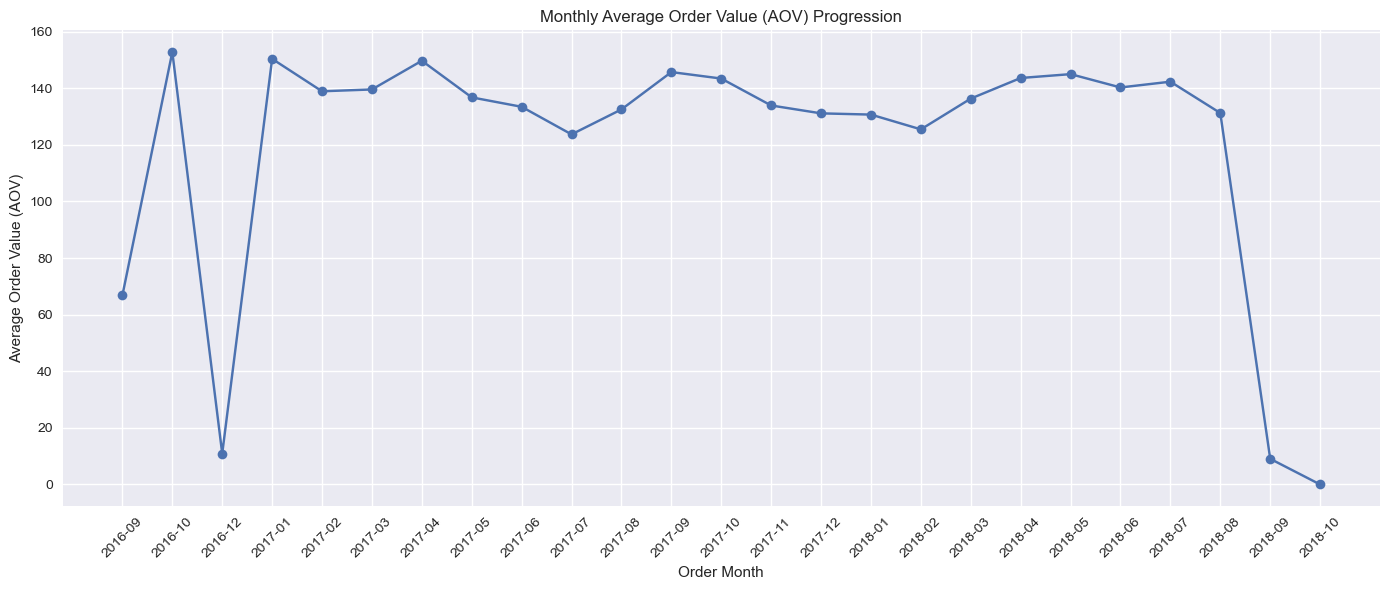

AOV progression summary:
                AOV
order_month        
2016-09       66.84
2016-10      152.80
2016-12       10.90
2017-01      150.39
2017-02      138.93
2017-03      139.58
2017-04      149.72
2017-05      136.78
2017-06      133.45
2017-07      123.70
2017-08      132.53
2017-09      145.72
2017-10      143.43
2017-11      133.92
2017-12      131.13
2018-01      130.70
2018-02      125.47
2018-03      136.35
2018-04      143.63
2018-05      144.99
2018-06      140.28
2018-07      142.32
2018-08      131.25
2018-09        9.06
2018-10        0.00


In [127]:
# Calculate monthly average order value (AOV) progression

# 1. Aggregate total revenue and order count per month
monthly_revenue = (
    pd.merge(
        orders_with_customer[['order_id', 'order_purchase_timestamp', 'order_month']],
        order_items.groupby('order_id')['price'].sum().reset_index(),
        on='order_id',
        how='left'
    )
    .groupby('order_month')
    .agg(total_revenue=('price', 'sum'), order_count=('order_id', 'nunique'))
    .reset_index()
)

# 2. Calculate AOV for each month
monthly_revenue['AOV'] = monthly_revenue['total_revenue'] / monthly_revenue['order_count']

# 3. Plot the AOV progression
plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue['order_month'].astype(str), monthly_revenue['AOV'], marker='o')
plt.title('Monthly Average Order Value (AOV) Progression')
plt.xlabel('Order Month')
plt.ylabel('Average Order Value (AOV)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Show summary statistics
print("AOV progression summary:")
print(monthly_revenue[['order_month', 'AOV']].set_index('order_month').round(2))

In [132]:
# Merge top_sellers with reviews to get review statistics for each top seller
# First, merge prod_order_items_orders with reviews to associate seller_id with reviews
order_reviews = pd.merge(prod_order_items_orders[['order_id', 'seller_id']], reviews, on='order_id', how='inner')

# Filter for top sellers
top_seller_ids = top_sellers['seller_id']
top_seller_reviews = order_reviews[order_reviews['seller_id'].isin(top_seller_ids)]

# Aggregate review statistics for each top seller
seller_review_stats = (
    top_seller_reviews.groupby('seller_id')
    .agg(
        total_reviews=('review_id', 'count'),
        avg_review_score=('review_score', 'mean'),
        five_star_pct=('review_score', lambda x: (x == 5).mean() * 100),
        one_star_pct=('review_score', lambda x: (x == 1).mean() * 100)
    )
    .reset_index()
)

# Merge with top_sellers for context
top_sellers_with_reviews = pd.merge(top_sellers, seller_review_stats, on='seller_id', how='left')

# Show top sellers by average review score
top_sellers_with_reviews.sort_values('avg_review_score', ascending=False)

,seller_id,seller_city,seller_state,total_sales,total_orders,avg_order_value,total_items_sold,avg_freight_value,total_reviews,avg_review_score,five_star_pct,one_star_pct
19,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,79284.55,166,453.054571,175,22.314857,175,4.434286,70.285714,6.285714
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03,585,331.129744,586,17.137713,582,4.340206,67.697595,8.591065
7,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,141745.53,1160,121.046567,1171,17.850427,1166,4.234991,61.492281,7.718696
12,620c87c171fb2a6dd6e8bb4dec959fc6,petropolis,RJ,114774.50,740,143.827694,798,17.713296,790,4.215190,66.582278,11.265823
5,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,176431.87,336,518.917265,340,18.594647,339,4.206490,62.831858,10.324484
17,a1043bafd471dff536d0c462352beb48,ilicinea,MG,101901.16,718,132.339169,770,41.355961,767,4.189048,59.191656,9.647979
10,46dc3b2cc0980fb8ec44634e21d2718e,rio de janeiro,RJ,128111.19,521,236.367509,542,21.768450,535,4.181308,62.616822,11.588785
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63,1132,198.505735,1156,17.446427,1148,4.122822,59.494774,10.975610
18,3d871de0142ce09b7081e2b9d1733cb1,campo limpo paulista,SP,94914.20,1080,82.749956,1147,19.558422,1136,4.114437,55.633803,9.330986
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05,358,543.356220,410,31.903976,408,4.075980,51.470588,10.049020


Top 10 cities by unique sellers:
        seller_city  unique_sellers
517       sao paulo             694
159        curitiba             127
450  rio de janeiro              96
64   belo horizonte              68
442  ribeirao preto              52
220       guarulhos              50
227        ibitinga              49
483     santo andre              45
101        campinas              41
325         maringa              40

Top 10 states by unique sellers:
   seller_state  unique_sellers
22           SP            1849
15           PR             349
8            MG             244
20           SC             190
16           RJ             171
19           RS             129
6            GO              40
4            DF              30
5            ES              23
2            BA              19

Herfindahl-Hirschman Index (HHI) for seller market concentration: 35.69


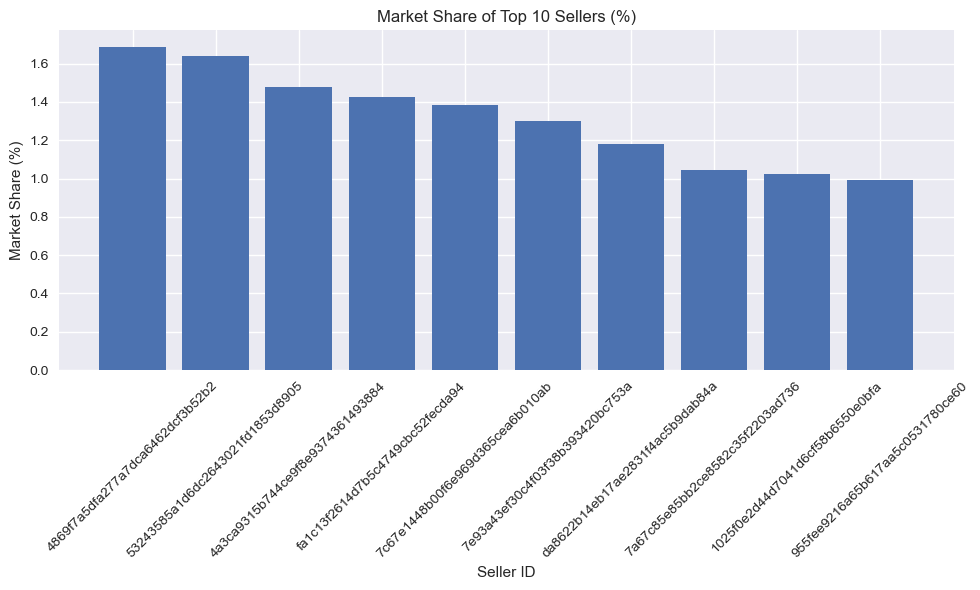

Cumulative market share of top 5 sellers: 7.61%
Cumulative market share of top 10 sellers: 13.15%
Cumulative market share of top 20 sellers: 21.09%
Cumulative market share of top 50 sellers: 32.89%


In [133]:
# Analyze seller diversity and market concentration

# 1. Seller diversity: Number of unique sellers per city and state
seller_diversity_city = sellers.groupby('seller_city')['seller_id'].nunique().reset_index(name='unique_sellers')
seller_diversity_state = sellers.groupby('seller_state')['seller_id'].nunique().reset_index(name='unique_sellers')

# Top 10 cities and states by number of unique sellers
top_cities_sellers = seller_diversity_city.sort_values('unique_sellers', ascending=False).head(10)
top_states_sellers = seller_diversity_state.sort_values('unique_sellers', ascending=False).head(10)

print("Top 10 cities by unique sellers:")
print(top_cities_sellers)

print("\nTop 10 states by unique sellers:")
print(top_states_sellers)

# 2. Market concentration: Calculate Herfindahl-Hirschman Index (HHI) for sellers by total sales
total_market_sales = seller_performance['total_sales'].sum()
seller_performance['market_share'] = seller_performance['total_sales'] / total_market_sales
seller_performance['market_share_sq'] = seller_performance['market_share'] ** 2
hhi = seller_performance['market_share_sq'].sum() * 10000  # HHI is usually scaled by 10,000

print(f"\nHerfindahl-Hirschman Index (HHI) for seller market concentration: {hhi:.2f}")

# 3. Visualize market share of top 10 sellers
top10_sellers = seller_performance.sort_values('total_sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top10_sellers['seller_id'], top10_sellers['market_share'] * 100)
plt.title('Market Share of Top 10 Sellers (%)')
plt.xlabel('Seller ID')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Calculate cumulative market share of top N sellers
for n in [5, 10, 20, 50]:
    cum_share = seller_performance.sort_values('total_sales', ascending=False).head(n)['market_share'].sum() * 100
    print(f"Cumulative market share of top {n} sellers: {cum_share:.2f}%")

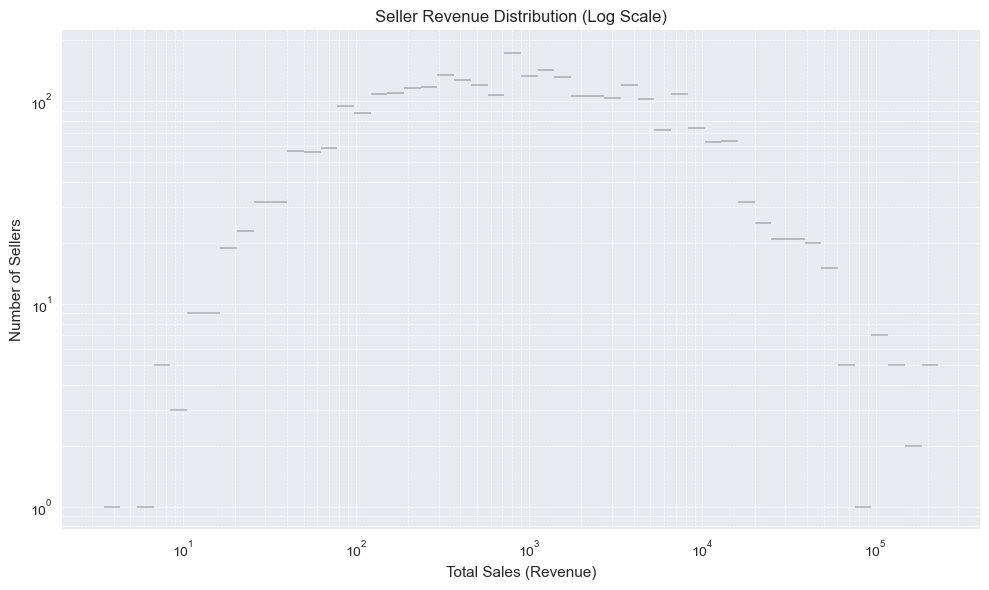

Seller revenue summary statistics:
count      3095.000000
mean       4391.484233
std       13921.997192
min           3.500000
25%         208.850000
50%         821.480000
75%        3280.830000
max      229472.630000
Name: total_sales, dtype: float64


In [135]:
# Plot the distribution of total sales (revenue) per seller
plt.figure(figsize=(10, 6))
sns.histplot(seller_performance['total_sales'], bins=50, log_scale=(True, True), color='skyblue')
plt.title('Seller Revenue Distribution (Log Scale)')
plt.xlabel('Total Sales (Revenue)')
plt.ylabel('Number of Sellers')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()

# Show summary statistics
print("Seller revenue summary statistics:")
print(seller_performance['total_sales'].describe())

In [136]:
# Calculate product variety (number of unique products) per seller
seller_product_variety = order_items.groupby('seller_id')['product_id'].nunique().reset_index()
seller_product_variety = seller_product_variety.rename(columns={'product_id': 'unique_products'})

# Merge with seller_performance for context (optional)
seller_variety_performance = pd.merge(seller_performance, seller_product_variety, on='seller_id', how='left')

# Show top 10 sellers by product variety
seller_variety_performance.sort_values('unique_products', ascending=False)[['seller_id', 'seller_city', 'seller_state', 'unique_products']].head(10)

,seller_id,seller_city,seller_state,unique_products
881,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,399
2485,cca3071e3e9bb7d12640c9fbe2301306,ibitinga,SP,322
2617,d91fb3b7d041e83b64a00a3edfb37e4f,praia grande,SP,315
3024,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,289
1391,7142540dd4c91e2237acb7e911c4eba2,penapolis,SP,266
1235,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,256
2643,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,222
2836,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,220
731,3d871de0142ce09b7081e2b9d1733cb1,campo limpo paulista,SP,202
1535,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,198


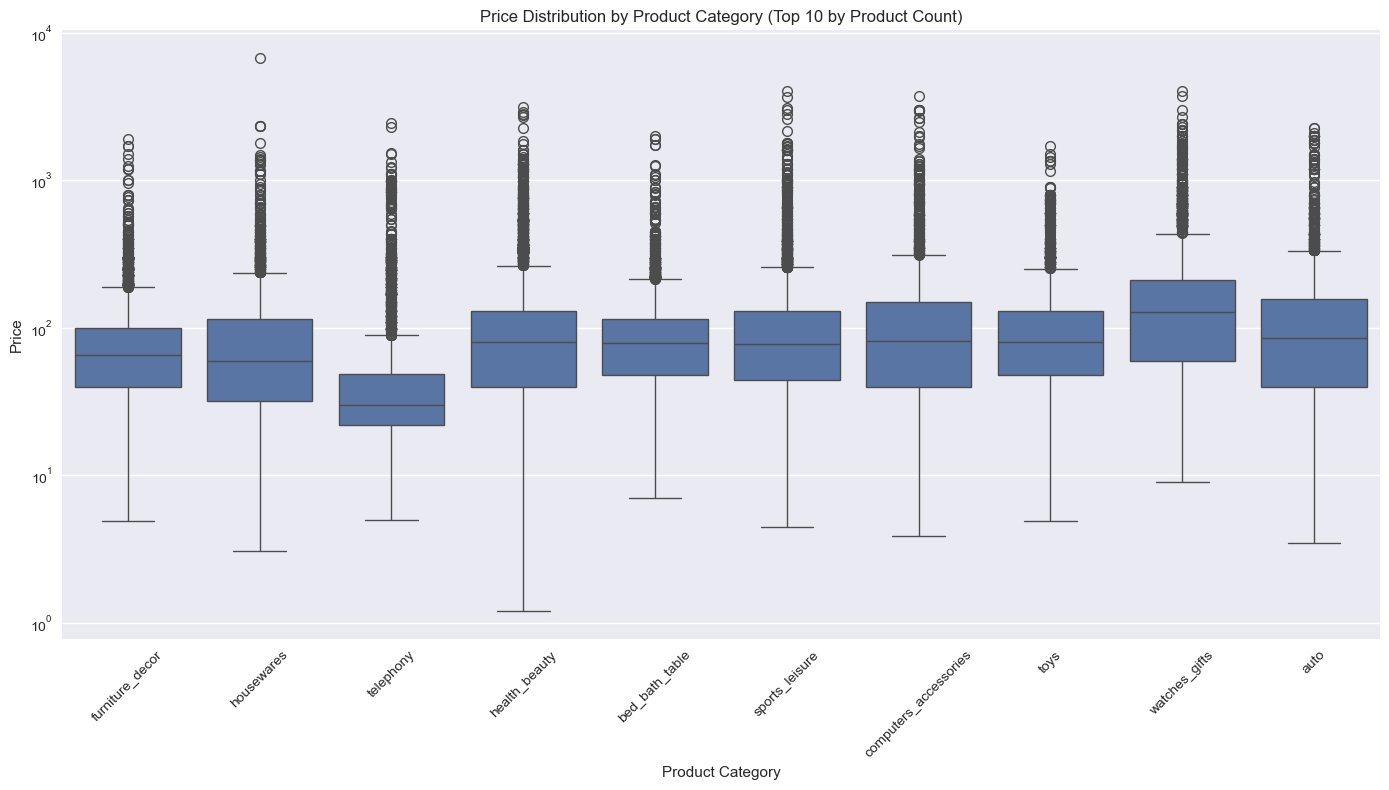

In [138]:
# Analyze price distribution by product category

# Merge products with order_items to get category and price together
prod_prices = pd.merge(
    order_items[['product_id', 'price']],
    products[['product_id', 'product_category_name_english']],
    on='product_id',
    how='left'
)

# Filter out missing categories if any
prod_prices = prod_prices.dropna(subset=['product_category_name_english'])

# Plot boxplots of price distribution for top 10 categories by product count
top10_cats = products_count.sort_values('product_id', ascending=False).head(10)['product_category_name_english']

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=prod_prices[prod_prices['product_category_name_english'].isin(top10_cats)],
    x='product_category_name_english',
    y='price'
)
plt.title('Price Distribution by Product Category (Top 10 by Product Count)')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [140]:
# Merge order_items with reviews to get price and review_score per order item
order_items_reviews = pd.merge(order_items, reviews[['order_id', 'review_score']], on='order_id', how='inner')

# Merge with products to get product_category_name_english
order_items_reviews = pd.merge(order_items_reviews, products[['product_id', 'product_category_name_english']], on='product_id', how='left')

# 1. Correlation between price and review score (per order item)
price_review_corr = order_items_reviews[['price', 'review_score']].corr().loc['price', 'review_score']
print(f"Correlation between price and review score: {price_review_corr:.3f}")

# 2. Correlation between price and sales volume (by product)
# Aggregate sales volume per product
product_sales = order_items.groupby('product_id').size().reset_index(name='sales_volume')
product_avg_price = order_items.groupby('product_id')['price'].mean().reset_index(name='avg_price')

# Merge sales volume and average price
product_price_sales = pd.merge(product_sales, product_avg_price, on='product_id')

# Correlation between average price and sales volume
price_sales_corr = product_price_sales[['avg_price', 'sales_volume']].corr().loc['avg_price', 'sales_volume']
print(f"Correlation between average price and sales volume: {price_sales_corr:.3f}")

# 3. Correlation between review score and sales volume (by product)
# Aggregate average review score per product
product_review_score = (
    pd.merge(order_items[['order_id', 'product_id']], reviews[['order_id', 'review_score']], on='order_id', how='inner')
    .groupby('product_id')['review_score'].mean().reset_index(name='avg_review_score')
)

# Merge with sales volume
product_review_sales = pd.merge(product_sales, product_review_score, on='product_id', how='inner')

# Correlation between average review score and sales volume
review_sales_corr = product_review_sales[['avg_review_score', 'sales_volume']].corr().loc['avg_review_score', 'sales_volume']
print(f"Correlation between average review score and sales volume: {review_sales_corr:.3f}")

Correlation between price and review score: -0.004
Correlation between average price and sales volume: -0.032
Correlation between average review score and sales volume: -0.004


=== Peak Demand Periods ===
Top 5 peak hours (by purchase volume):
hour
16    6675
11    6578
14    6569
13    6518
15    6454
Name: count, dtype: int64

Top 3 peak days of the week:
Monday: 16196 purchases
Tuesday: 15963 purchases
Wednesday: 15552 purchases

Top 3 peak months:
Aug: 10843 purchases
May: 10573 purchases
Jul: 10318 purchases

Purchases by season:
Summer: 30573 purchases (30.7%)
Spring: 29809 purchases (30.0%)
Winter: 22251 purchases (22.4%)
Fall: 16808 purchases (16.9%)

=== Recommendations for Inventory & Logistics Optimization ===

1. Inventory Planning:
   - Encourage sellers to increase stock levels of top-selling products ahead of peak months (especially in Summer and Spring).
   - Use historical sales data to forecast demand spikes by category and region.
   - Prioritize replenishment for categories with high sales volatility during peak periods.

2. Logistics Capacity:
   - Scale up logistics resources (warehousing, delivery fleet, staff) before and during peak mo

Orders by season (peak demand periods):
season
Summer    30573
Spring    29809
Winter    22251
Fall      16808
Name: count, dtype: int64

Orders by month:
month
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: count, dtype: int64


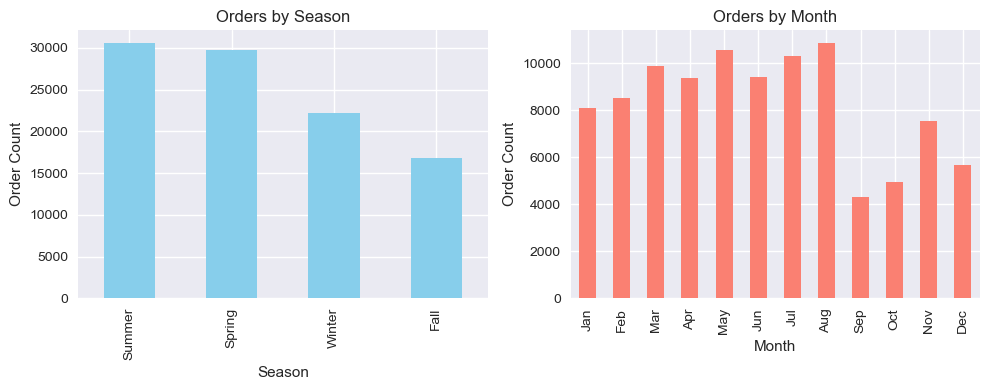


=== Recommendations for Inventory & Logistics Optimization ===

1. Inventory Planning:
    - Encourage sellers to increase stock levels of top-selling products ahead of peak months (especially in Summer and Spring).
    - Use historical sales data to forecast demand spikes by category and region.
    - Prioritize replenishment for categories with high sales volatility during peak periods.

2. Logistics Capacity:
    - Scale up logistics resources (warehousing, delivery fleet, staff) before and during peak months and weekends.
    - Implement dynamic routing and delivery scheduling to handle increased order volume efficiently.
    - Partner with third-party logistics providers for flexible capacity during demand surges.

3. Customer Satisfaction:
    - Communicate expected delivery times transparently, especially during high-demand periods.
    - Monitor delivery performance and proactively resolve delays.
    - Offer incentives (e.g., free/discounted shipping) for off-peak delivery sl

In [148]:

# Identify peak demand periods by season and month
# Use 'orders' DataFrame, which already has 'month', 'season', and 'order_purchase_timestamp'

# 1. Aggregate order counts by season and month
seasonal_order_counts = orders['season'].value_counts().sort_values(ascending=False)
monthly_order_counts = orders['month'].value_counts().sort_index()

print("Orders by season (peak demand periods):")
print(seasonal_order_counts)
print("\nOrders by month:")
print(monthly_order_counts)

# 2. Visualize orders by season and month
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
seasonal_order_counts.plot(kind='bar', color='skyblue')
plt.title('Orders by Season')
plt.ylabel('Order Count')
plt.xlabel('Season')

plt.subplot(1, 2, 2)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_order_counts.index = month_labels
monthly_order_counts.plot(kind='bar', color='salmon')
plt.title('Orders by Month')
plt.ylabel('Order Count')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 3. Recommendations for inventory & logistics optimization
recommendations = """
=== Recommendations for Inventory & Logistics Optimization ===

1. Inventory Planning:
    - Encourage sellers to increase stock levels of top-selling products ahead of peak months (especially in Summer and Spring).
    - Use historical sales data to forecast demand spikes by category and region.
    - Prioritize replenishment for categories with high sales volatility during peak periods.

2. Logistics Capacity:
    - Scale up logistics resources (warehousing, delivery fleet, staff) before and during peak months and weekends.
    - Implement dynamic routing and delivery scheduling to handle increased order volume efficiently.
    - Partner with third-party logistics providers for flexible capacity during demand surges.

3. Customer Satisfaction:
    - Communicate expected delivery times transparently, especially during high-demand periods.
    - Monitor delivery performance and proactively resolve delays.
    - Offer incentives (e.g., free/discounted shipping) for off-peak delivery slots to balance demand.

4. Data-Driven Actions:
    - Continuously monitor real-time sales and inventory levels to adjust operations dynamically.
    - Share demand forecasts and insights with sellers to align their inventory planning.

By aligning inventory and logistics capacity with these peak demand periods, sellers and the platform can maximize revenue while maintaining high customer satisfaction.
"""
print(recommendations)
